# 绘图流程

* 前面提到过有时候需要基于`Axes`同时绘制多个子图，那么不妨在即使只有一张子图的情况下也使用相同的绘制流程。  
  即创建画布与子图，再分别在各个子图上进行绘制。  
  这样的好处在于流程以及所使用的方法都是固定的，不用专门在“绘制一张子图”与“绘制多张子图”之间转换思维方式。  
  另见[Matplotlib代码风格](https://matplotlib.org/stable/users/explain/quick_start.html#coding-styles)。
* 这里将具体展示单张子图、多张子图、多张子画布的绘制。  
  可以看到总体的流程都基本一致。

## 准备数据

* 准备数据的过程并不是这里的重点。
* 因此只简单创建了$y = (x - a)^2 + b$所对应的`x`与`y`，并基于此绘制折线图以作示例。  
  $a$与$b$在绘制单张子图时默认为$0$，在多张子图时会有所调整。

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def get_xy(a: int = 0, b: int = 0) -> tuple[np.ndarray]:
    """准备绘图数据.

    Args:
        a (int, optional): 抛物线顶点的横坐标. Defaults to 0.
        b (int, optional): 抛物线顶点的纵坐标. Defaults to 0.

    Returns:
        tuple[np.ndarray]: x轴、y轴的绘图数据.

    """
    x = np.linspace(0, 2, 51)
    y = np.power(x - a, 2) + b
    return x, y

## 单张子图

以下绘制流程可以概括为：
* 创建画布与子图
  * 设置画布大小
  * 设置子图布局
* 准备数据
* 绘制图像
  * 绘制基本图像（这里是折线图，也可以是散点图、散点密度图、阶梯图等）
  * 美化（即下述无脑使用的三行）
  * 设置x轴、y轴（这里是范围与标签，还可以设置对数比例尺）
  * 添加元素（图例、文本等）
* 展示或保存图像

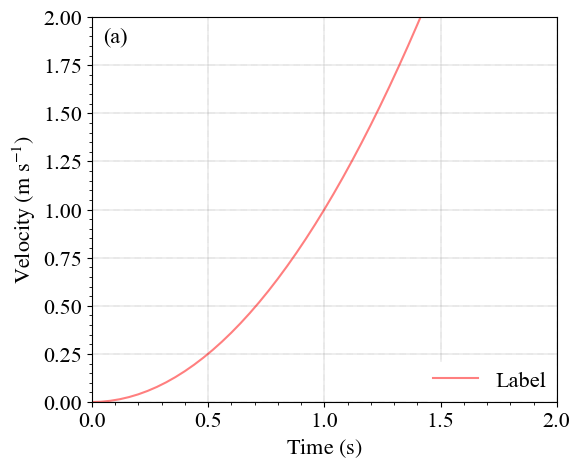

In [2]:
# ==创建画布与子图==
# 创建画布
# 设定该画布的横向宽度与纵向高度分别为6和5
# 个人习惯将有m行n列子图的画布设定为宽6n高5m
fig = plt.figure(figsize=(6, 5))
# 在该画布内创建了1行1列的子图
ax = fig.subplots(1, 1)

# ==准备数据==
x, y = get_xy()

# ==绘制图像==
# 传入x轴、y轴数据并绘制折线图
ax.plot(
    x,  # x轴数据
    y,  # y轴数据
    linestyle="-",  # 线条样式设置为实线（默认是实线，删掉这行并不会影响结果）
    color="red",  # 线条颜色设置为红色（默认是蓝色）
    alpha=0.5,  # 线条透明度设置为0.5
    label="Label",  # 线条在图例中的标签（如果不需要图例的话可以删掉这行）
)
# 以下是个人绘制此类图常常无脑使用的三行
# 分别是：添加网格线、开启次刻度标记、设置刻度的字体大小
ax.grid(linestyle=":", linewidth=0.3, color="black")
ax.minorticks_on()
ax.tick_params(labelsize=16)
# 设置x轴、y轴范围
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
# 设置x轴、y轴标签及其字体大小
# （这里是随便假定的标签）
# 文本使用了LaTeX，能够方便物理量单位中上标的展示
ax.set_xlabel(
    "$\\mathrm{ Time \\ \\left( s \\right) }$",
    fontsize=16,
)
ax.set_ylabel(
    "$\\mathrm{ Velocity \\ \\left( m \\ s^{-1} \\right) }$",
    fontsize=16,
)
# 添加图例
# 这里的位置以子图左下角为(0, 0)，子图右上角为(1, 1)
# 平常画图的时候按需调整位置
# 其他参数可以不用管
ax.legend(
    loc=(0.715, 0.005),  # 位置
    fontsize=16,  # 字体大小
    facecolor="white",  # 背景颜色
    framealpha=1,  # 边框透明度
    edgecolor="1",  # 边框颜色
)
# 添加文本注释
# 这里的transform=ax.transAxes使得文本位置(x, y)：
# 在子图左下角是(0, 0)，在子图右上角是(1, 1)
# 文本框样式里设置了：背景颜色、透明度、边框线宽（linewidth）
# 平常画图的时候按需调整位置、文本内容、对齐方式
# 其他参数可以不用管
ax.text(
    x=0.025,  # 文本位置的x坐标
    y=0.975,  # 文本位置的y坐标
    s="(a)",  # 文本内容
    ha="left",  # 水平方向上左对齐
    va="top",  # 垂直方向上顶部对齐
    fontsize=16,  # 字体大小
    transform=ax.transAxes,  # 文本位置以子图的宽与高为单位一
    bbox={"facecolor": "white", "alpha": 0.5, "lw": 0},  # 文本框样式
)

# ==展示图像==
# 个人暂时不常用
# 在这里使用只是因为没有保存图像的需求
plt.show()
# ==保存图像==
# 更多时候请使用fig.savefig("name.png", bbox_inches="tight")将图像保存起来
# （注意文件保存路径）
# 这里的bbox_inches="tight"可以自动裁剪图像以最小化子图周围的空白区域

## 多张子图

所有子图都会有的重复操作可以进行整合，简化代码的同时也方便进行修改。  
以下函数所整合的内容包括（括号内标示了与上述代码块的异同点）：
* 是否显示标签（额外添加的设置，否则每个子图都重复显示相同的刻度标签会很冗余）
* 美化（与前一致）
* 设置x轴、y轴（只设置了范围，标签在画布上统一添加）
* 添加元素（只添加了文本，图例在b1子图上会挡住线条所以暂时删去）

In [3]:
def ax2ax(
    ax: plt.Axes,
    text: str,
    *,
    bottom: bool = True,
    left: bool = True,
) -> None:
    """规范化子图.

    Args:
        ax (plt.Axes): 输入子图.
        text (str): 待添加的文本.
        bottom (bool, optional): 是否显示子图底部的刻度标签. Defaults to True.
        left (bool, optional): 是否显示子图左侧的刻度标签. Defaults to True.

    """
    # bottom == True时，子图底部显示x轴默认的刻度标签
    # bottom == False时，子图底部不显示x轴的刻度标签
    if not bottom:
        ax.set_xticklabels([])
    # left == True时，子图左侧显示y轴默认的刻度标签
    # left == False时，子图左侧不显示y轴的刻度标签
    if not left:
        ax.set_yticklabels([])
    # 下述代码的具体含义都能在上面的代码块中找到
    ax.grid(linestyle=":", linewidth=0.3, color="black")
    ax.minorticks_on()
    ax.tick_params(labelsize=16)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.text(
        x=0.025,
        y=0.975,
        s=text,
        ha="left",
        va="top",
        fontsize=16,
        transform=ax.transAxes,
        bbox={"facecolor": "white", "alpha": 0.5, "lw": 0},
    )

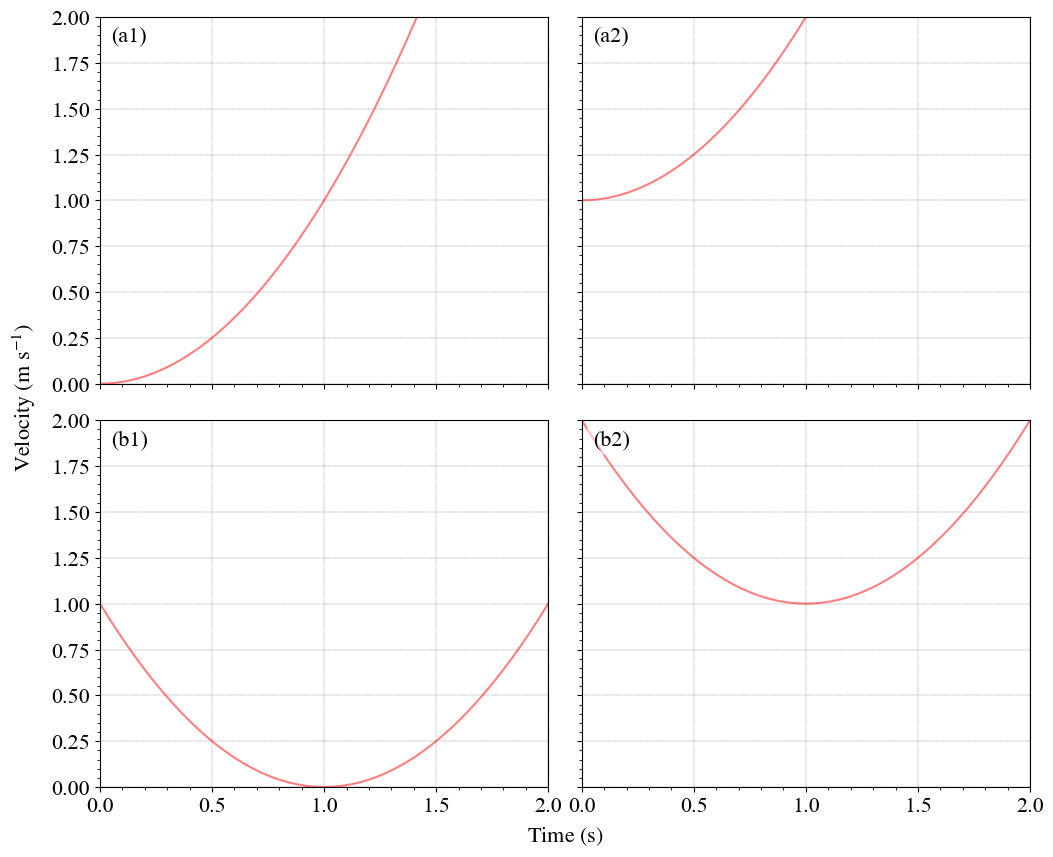

In [4]:
# ==创建画布与子图==
# 创建画布并设定大小
fig = plt.figure(figsize=(12, 10))
# 调整子图间距
# wspace、hspace分别是各个子图间在横向宽度（width）与纵向高度（height）上的间距
# 默认值0.2
# 此外还有参数left、right、bottom、top
# 分别是子图与画布左右、底顶的间距
# 碎碎念：
# 丢掉PPT和画板
# 子图间距不合适的时候在这里调整就行
fig.subplots_adjust(wspace=0.075, hspace=0.1)
# 创建2行2列的子图
# 这样得到的`axes`是2行2列的多维数组
# 里面的每个元素都是单个子图，即上面的`ax`
# 此外还有参数sharex、sharey
# 表示各个子图是否共享x轴或y轴的范围
# 选择共享时可以设置具体方式
# 默认值False，即不共享
axes = fig.subplots(2, 2)

# ==添加公共标签==
# （仅在有需求的时候添加公共标签）
# 添加公共的x轴标签并调整位置与字号
# 默认x=0.5、y=0.01
fig.supxlabel(
    x=0.5125,
    y=0.05,
    t="$\\mathrm{ Time \\ \\left( s \\right) }$",
    fontsize=16,
)
# 添加公共的y轴标签并调整位置字号
# 默认x=0.02、y=0.5
fig.supylabel(
    x=0.05,
    y=0.5,
    t="$\\mathrm{ Velocity \\ \\left( m \\ s^{-1} \\right) }$",
    fontsize=16,
)

# ==绘制图像==
# 遍历2行（从0开始索引）
for row in range(2):
    # 遍历2列（从0开始索引）
    for col in range(2):
        # 第row行、第col列
        # 得到的绘图数据是以(row, col)为顶点的抛物线
        x, y = get_xy(row, col)
        # 从`axes`索引得到单个子图
        ax = axes[row, col]
        # 与上面一样的绘制折线图
        # 区别只有删去了用于在图例中展示的标签
        ax.plot(
            x,
            y,
            linestyle="-",
            color="red",
            alpha=0.5,
        )
        # 规范化子图
        # 即：将一些重复操作整合起来
        # 这里的文本内容包含两部分
        # chr(97)返回97对应的ASCII字符，即“a”
        # 因此row = 0时得到“a”，row = 1时得到“b”
        # 另一部分col = 0时得到“1”，col = 1时得到“2”
        ax2ax(
            ax,  # 传入子图
            f"({chr(row + 97)}{col + 1})",  # 传入左上角需要标示的文本内容
            bottom=(row == 1),  # 最后一行显示底部刻度标签
            left=(col == 0),  # 第一列显示左侧刻度标签
        )

# ==展示图像==
plt.show()

## 多个子画布

目前个人遇到的、需要使用子画布的情形有：
* 不同子图有不同的投影方式（投影方式会在后续绘制wrfout的二维平面图时用到，并且只能在使用`fig.subplots()`创建子图时统一设置）
* 绘制出来的子图由于种种原因高度不一致

以下仅展示创建画布、子画布、子图的过程及效果，并不绘制具体图像。

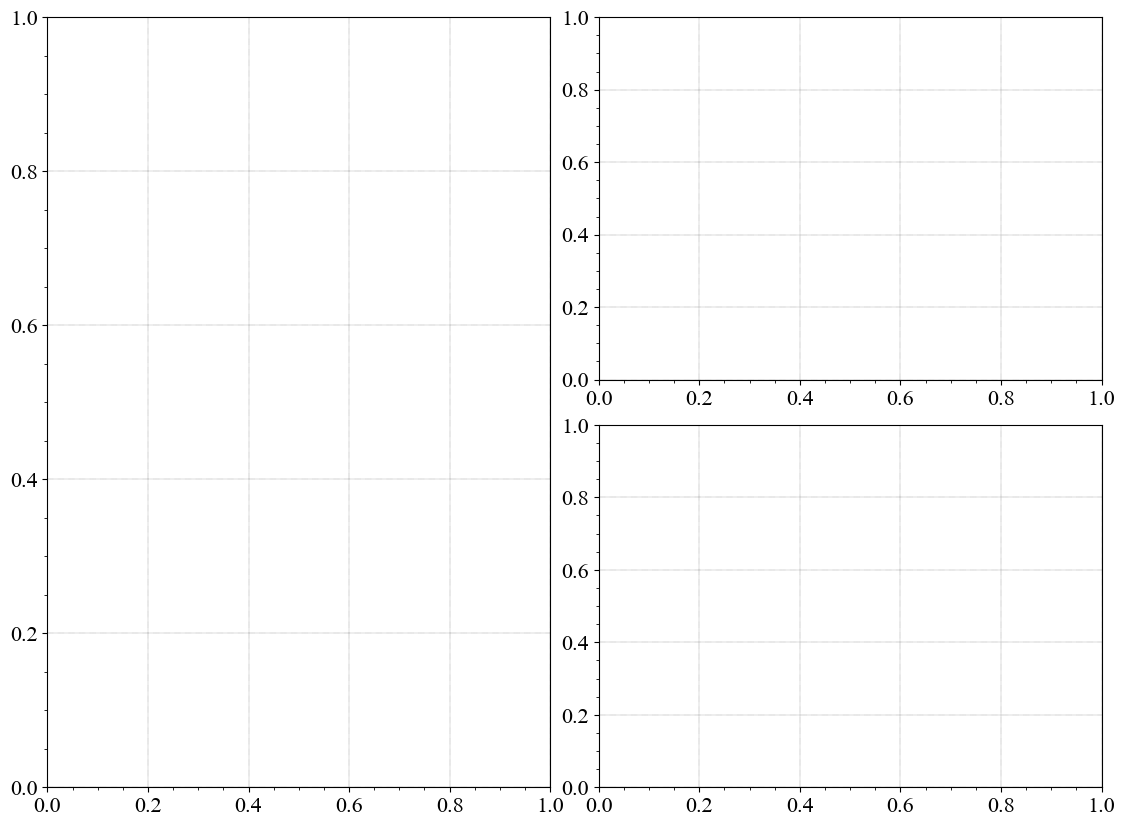

In [5]:
# ==创建画布、子画布、子图==
# 创建画布并设定大小
fig = plt.figure(figsize=(12, 10))
# 创建1行2列的子画布并设置横向宽度的间距
# 类似`axes`，得到的也是1行2列的多维数组
# 里面的每个元素都是单个子画布，即下面的`subfig`
subfigs = fig.subfigures(1, 2, wspace=-0.15)
# 对于第一个子画布...
subfig = subfigs[0]
# 创建一个子图
ax = subfig.subplots(1, 1)
# “老三样”
ax.grid(linestyle=":", linewidth=0.3, color="black")
ax.minorticks_on()
ax.tick_params(labelsize=16)
# 对于第二个子画布...
subfig = subfigs[1]
# 调整内部子图的纵向高度间距
subfig.subplots_adjust(hspace=0.125)
# 设置背景颜色为None，否则默认的白色会盖住其他子画布
subfig.set_facecolor("none")
# 创建2行1列的子图
axes = subfig.subplots(2, 1)
# 对于其中的每个子图都“老三样”
for ax in axes:
    ax.grid(linestyle=":", linewidth=0.3, color="black")
    ax.minorticks_on()
    ax.tick_params(labelsize=16)

# ==展示图像==
plt.show()